# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Clouds":[]
})

print("""
                             Beginning Data Retrieval
--------------------------------------------------------------------------------
""")
count = 1

for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units={units}"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        cty_cloud = weather_json["clouds"]["all"]
        cty_cntry = weather_json["sys"]["country"]
        cty_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        cty_humid = weather_json["main"]["humidity"]
        cty_lat = weather_json["coord"]["lat"]
        cty_long = weather_json["coord"]["lat"]
        cty_mx_tmp = weather_json["main"]["temp_max"]
        cty_wndspd = weather_json["wind"]["speed"]
        
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":cty_cntry,
            "Latitude":cty_lat,
            "Longitude":cty_long,
            "Date":cty_date,
            "Temperature":cty_mx_tmp, 
            "Humidity":cty_humid,
            "Wind Speed":cty_wndspd,
            "Clouds":cty_cloud
        }, ignore_index=True)
        count+=1
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


                             Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | taolanaro
Insufficient data. Skipping..
Processing Record 1 of Set 1 | rawannawi
Insufficient data. Skipping..
Processing Record 1 of Set 1 | wuchang
Processing Record 2 of Set 1 | pangnirtung
Processing Record 3 of Set 1 | illoqqortoormiut
Insufficient data. Skipping..
Processing Record 3 of Set 1 | were ilu
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | hervey bay
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | marechal candido rondon
Processing Record 15 of Set 1 | hilo
Processi

Processing Record 162 of Set 1 | faanui
Processing Record 163 of Set 1 | flinders
Processing Record 164 of Set 1 | develi
Processing Record 165 of Set 1 | coihaique
Processing Record 166 of Set 1 | chokurdakh
Processing Record 167 of Set 1 | mingyue
Processing Record 168 of Set 1 | cidreira
Processing Record 169 of Set 1 | lompoc
Processing Record 170 of Set 1 | severo-kurilsk
Processing Record 171 of Set 1 | arti
Processing Record 172 of Set 1 | ryotsu
Processing Record 173 of Set 1 | kadaura
Processing Record 174 of Set 1 | norman wells
Processing Record 175 of Set 1 | hopelchen
Processing Record 176 of Set 1 | nikolskoye
Processing Record 177 of Set 1 | cayenne
Processing Record 178 of Set 1 | ahipara
Processing Record 179 of Set 1 | longlac
Insufficient data. Skipping..
Processing Record 179 of Set 1 | atambua
Processing Record 180 of Set 1 | onega
Processing Record 181 of Set 1 | arman
Processing Record 182 of Set 1 | am timan
Processing Record 183 of Set 1 | boa vista
Processing 

Processing Record 336 of Set 1 | talara
Processing Record 337 of Set 1 | marsala
Processing Record 338 of Set 1 | malartic
Processing Record 339 of Set 1 | la ronge
Processing Record 340 of Set 1 | sangar
Processing Record 341 of Set 1 | manaure
Processing Record 342 of Set 1 | praia
Processing Record 343 of Set 1 | fairbanks
Processing Record 344 of Set 1 | waitara
Processing Record 345 of Set 1 | lephepe
Insufficient data. Skipping..
Processing Record 345 of Set 1 | grindavik
Processing Record 346 of Set 1 | portland
Processing Record 347 of Set 1 | langham
Processing Record 348 of Set 1 | yomitan
Insufficient data. Skipping..
Processing Record 348 of Set 1 | tahe
Processing Record 349 of Set 1 | lufilufi
Processing Record 350 of Set 1 | iroquois falls
Processing Record 351 of Set 1 | basco
Processing Record 352 of Set 1 | sevlievo
Processing Record 353 of Set 1 | ileza
Processing Record 354 of Set 1 | owando
Processing Record 355 of Set 1 | dzhusaly
Insufficient data. Skipping..
Pro

Processing Record 506 of Set 1 | blonduos
Insufficient data. Skipping..
Processing Record 506 of Set 1 | kidodi
Processing Record 507 of Set 1 | dryden
Processing Record 508 of Set 1 | rio gallegos
Processing Record 509 of Set 1 | axim
Processing Record 510 of Set 1 | salta
Processing Record 511 of Set 1 | yanam
Processing Record 512 of Set 1 | grand gaube
Processing Record 513 of Set 1 | itaituba
Processing Record 514 of Set 1 | progreso
Processing Record 515 of Set 1 | ambon
Processing Record 516 of Set 1 | susanville
Processing Record 517 of Set 1 | nelson bay
Processing Record 518 of Set 1 | adre
Processing Record 519 of Set 1 | caucaia
Processing Record 520 of Set 1 | solsvik
Insufficient data. Skipping..
Processing Record 520 of Set 1 | nyrob
Processing Record 521 of Set 1 | zhuhai
Processing Record 522 of Set 1 | ust-bolsheretsk
Insufficient data. Skipping..
Processing Record 522 of Set 1 | sistranda
Processing Record 523 of Set 1 | shambu
Processing Record 524 of Set 1 | zitlal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#weather_df.to_csv(output_data_file)
weather_df.head(20)

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,wuchang,CN,44.93,44.93,2019-01-07,10.77,52.0,8.21,56.0
1,pangnirtung,CA,66.15,66.15,2019-01-07,-13.45,82.0,9.89,44.0
2,were ilu,ET,10.60,10.60,2019-01-07,56.17,25.0,1.16,8.0
3,bredasdorp,ZA,-34.53,-34.53,2019-01-07,69.80,68.0,5.82,75.0
4,khatanga,RU,71.98,71.98,2019-01-07,-37.75,0.0,3.62,20.0
5,guerrero negro,MX,27.97,27.97,2019-01-07,49.47,100.0,4.63,12.0
6,vaini,IN,15.34,15.34,2019-01-07,78.80,31.0,11.41,0.0
7,port elizabeth,US,39.31,39.31,2019-01-06,37.04,60.0,6.93,1.0
8,saldanha,PT,41.42,41.42,2019-01-07,16.66,73.0,2.84,0.0
9,hervey bay,AU,-25.30,-25.30,2019-01-07,80.60,57.0,17.22,40.0


In [7]:
weather_df.count()

City Name      544
Country        544
Latitude       544
Longitude      544
Date           544
Temperature    544
Humidity       544
Wind Speed     544
Clouds         544
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

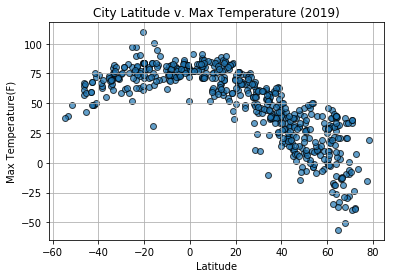

In [13]:
fig, ax = plt.subplots()
lat_v_temp = ax.scatter(
    weather_df["Latitude"],
    weather_df["Temperature"],
    alpha=0.7,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Max Temperature (2019)")
ax.set_ylabel("Max Temperature(F)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("Lat ~ Temp")

#### Latitude vs. Humidity Plot

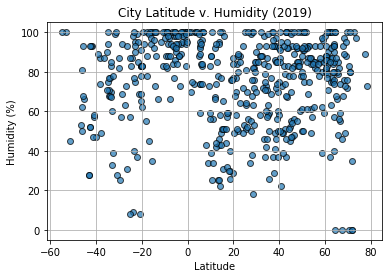

In [14]:
fig, ax = plt.subplots()
lat_v_humid = ax.scatter(
    weather_df["Latitude"],
    weather_df["Humidity"],
    alpha=0.7,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Humidity (2019)")
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("Lat ~ Humid")

#### Latitude vs. Cloudiness Plot

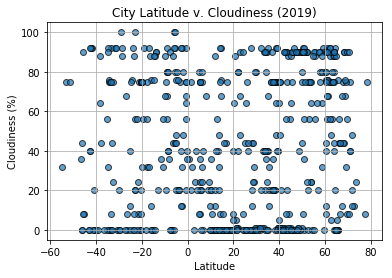

In [15]:
fig, ax = plt.subplots()
lat_v_cloud = ax.scatter(
    weather_df["Latitude"],
    weather_df["Clouds"],
    alpha=0.7,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Cloudiness (2019)")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("Lat ~ Cloud")

#### Latitude vs. Wind Speed Plot

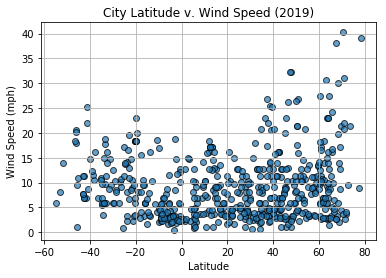

In [16]:
fig, ax = plt.subplots()
lat_v_cloud = ax.scatter(
    weather_df["Latitude"],
    weather_df["Wind Speed"],
    alpha=0.7,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Wind Speed (2019)")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("Lat ~ Wind")